<a href="https://colab.research.google.com/github/raizelgestetner/ASL_fingerspelling/blob/main/photo2parquet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adding some text

In [1]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [2]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 38.9 MB/s eta 0:00:00


In [8]:
import cv2
import numpy as np
import mediapipe as mp

In [9]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to frame_0.jpg


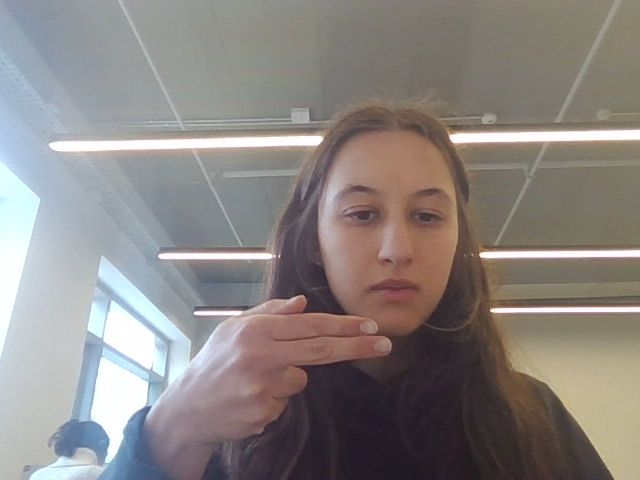

In [ ]:
from IPython.display import Image
for i in range(1):
  try:
    filename = take_photo(filename = f"frame_{i}.jpg")
    print('Saved to {}'.format(filename))

    # Show the image which was just taken.
    display(Image(filename))
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

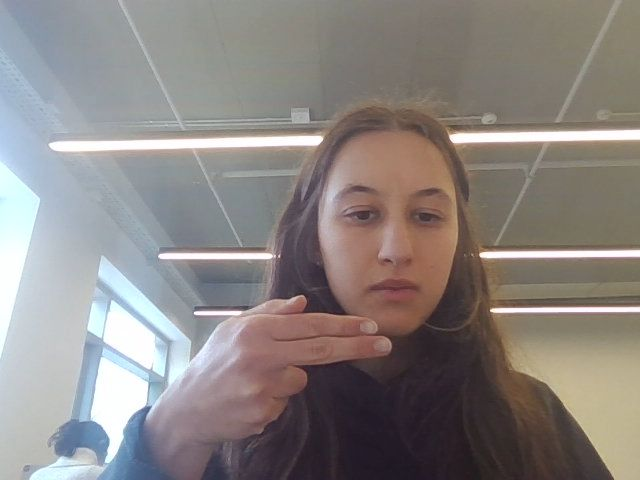

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('frame_0.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
import pandas as pd

In [11]:
selected_columns = ["x_face_0", "x_face_61", "x_face_185", "x_face_40", "x_face_39", "x_face_37", "x_face_267", "x_face_269", "x_face_270", "x_face_409", "x_face_291", "x_face_146", "x_face_91", "x_face_181", "x_face_84", "x_face_17", "x_face_314", "x_face_405", "x_face_321", "x_face_375", "x_face_78", "x_face_191", "x_face_80", "x_face_81", "x_face_82", "x_face_13", "x_face_312", "x_face_311", "x_face_310", "x_face_415", "x_face_95", "x_face_88", "x_face_178", "x_face_87", "x_face_14", "x_face_317", "x_face_402", "x_face_318", "x_face_324", "x_face_308", "x_left_hand_0", "x_left_hand_1", "x_left_hand_2", "x_left_hand_3", "x_left_hand_4", "x_left_hand_5", "x_left_hand_6", "x_left_hand_7", "x_left_hand_8", "x_left_hand_9", "x_left_hand_10", "x_left_hand_11", "x_left_hand_12", "x_left_hand_13", "x_left_hand_14", "x_left_hand_15", "x_left_hand_16", "x_left_hand_17", "x_left_hand_18", "x_left_hand_19", "x_left_hand_20", "x_right_hand_0", "x_right_hand_1", "x_right_hand_2", "x_right_hand_3", "x_right_hand_4", "x_right_hand_5", "x_right_hand_6", "x_right_hand_7", "x_right_hand_8", "x_right_hand_9", "x_right_hand_10", "x_right_hand_11", "x_right_hand_12", "x_right_hand_13", "x_right_hand_14", "x_right_hand_15", "x_right_hand_16", "x_right_hand_17", "x_right_hand_18", "x_right_hand_19", "x_right_hand_20", "x_face_1", "x_face_2", "x_face_98", "x_face_327", "x_face_33", "x_face_7", "x_face_163", "x_face_144", "x_face_145", "x_face_153", "x_face_154", "x_face_155", "x_face_133", "x_face_246", "x_face_161", "x_face_160", "x_face_159", "x_face_158", "x_face_157", "x_face_173", "x_face_263", "x_face_249", "x_face_390", "x_face_373", "x_face_374", "x_face_380", "x_face_381", "x_face_382", "x_face_362", "x_face_466", "x_face_388", "x_face_387", "x_face_386", "x_face_385", "x_face_384", "x_face_398", "x_pose_12", "x_pose_14", "x_pose_16", "x_pose_18", "x_pose_20", "x_pose_22", "x_pose_11", "x_pose_13", "x_pose_15", "x_pose_17", "x_pose_19", "x_pose_21", "y_face_0", "y_face_61", "y_face_185", "y_face_40", "y_face_39", "y_face_37", "y_face_267", "y_face_269", "y_face_270", "y_face_409", "y_face_291", "y_face_146", "y_face_91", "y_face_181", "y_face_84", "y_face_17", "y_face_314", "y_face_405", "y_face_321", "y_face_375", "y_face_78", "y_face_191", "y_face_80", "y_face_81", "y_face_82", "y_face_13", "y_face_312", "y_face_311", "y_face_310", "y_face_415", "y_face_95", "y_face_88", "y_face_178", "y_face_87", "y_face_14", "y_face_317", "y_face_402", "y_face_318", "y_face_324", "y_face_308", "y_left_hand_0", "y_left_hand_1", "y_left_hand_2", "y_left_hand_3", "y_left_hand_4", "y_left_hand_5", "y_left_hand_6", "y_left_hand_7", "y_left_hand_8", "y_left_hand_9", "y_left_hand_10", "y_left_hand_11", "y_left_hand_12", "y_left_hand_13", "y_left_hand_14", "y_left_hand_15", "y_left_hand_16", "y_left_hand_17", "y_left_hand_18", "y_left_hand_19", "y_left_hand_20", "y_right_hand_0", "y_right_hand_1", "y_right_hand_2", "y_right_hand_3", "y_right_hand_4", "y_right_hand_5", "y_right_hand_6", "y_right_hand_7", "y_right_hand_8", "y_right_hand_9", "y_right_hand_10", "y_right_hand_11", "y_right_hand_12", "y_right_hand_13", "y_right_hand_14", "y_right_hand_15", "y_right_hand_16", "y_right_hand_17", "y_right_hand_18", "y_right_hand_19", "y_right_hand_20", "y_face_1", "y_face_2", "y_face_98", "y_face_327", "y_face_33", "y_face_7", "y_face_163", "y_face_144", "y_face_145", "y_face_153", "y_face_154", "y_face_155", "y_face_133", "y_face_246", "y_face_161", "y_face_160", "y_face_159", "y_face_158", "y_face_157", "y_face_173", "y_face_263", "y_face_249", "y_face_390", "y_face_373", "y_face_374", "y_face_380", "y_face_381", "y_face_382", "y_face_362", "y_face_466", "y_face_388", "y_face_387", "y_face_386", "y_face_385", "y_face_384", "y_face_398", "y_pose_12", "y_pose_14", "y_pose_16", "y_pose_18", "y_pose_20", "y_pose_22", "y_pose_11", "y_pose_13", "y_pose_15", "y_pose_17", "y_pose_19", "y_pose_21", "z_face_0", "z_face_61", "z_face_185", "z_face_40", "z_face_39", "z_face_37", "z_face_267", "z_face_269", "z_face_270", "z_face_409", "z_face_291", "z_face_146", "z_face_91", "z_face_181", "z_face_84", "z_face_17", "z_face_314", "z_face_405", "z_face_321", "z_face_375", "z_face_78", "z_face_191", "z_face_80", "z_face_81", "z_face_82", "z_face_13", "z_face_312", "z_face_311", "z_face_310", "z_face_415", "z_face_95", "z_face_88", "z_face_178", "z_face_87", "z_face_14", "z_face_317", "z_face_402", "z_face_318", "z_face_324", "z_face_308", "z_left_hand_0", "z_left_hand_1", "z_left_hand_2", "z_left_hand_3", "z_left_hand_4", "z_left_hand_5", "z_left_hand_6", "z_left_hand_7", "z_left_hand_8", "z_left_hand_9", "z_left_hand_10", "z_left_hand_11", "z_left_hand_12", "z_left_hand_13", "z_left_hand_14", "z_left_hand_15", "z_left_hand_16", "z_left_hand_17", "z_left_hand_18", "z_left_hand_19", "z_left_hand_20", "z_right_hand_0", "z_right_hand_1", "z_right_hand_2", "z_right_hand_3", "z_right_hand_4", "z_right_hand_5", "z_right_hand_6", "z_right_hand_7", "z_right_hand_8", "z_right_hand_9", "z_right_hand_10", "z_right_hand_11", "z_right_hand_12", "z_right_hand_13", "z_right_hand_14", "z_right_hand_15", "z_right_hand_16", "z_right_hand_17", "z_right_hand_18", "z_right_hand_19", "z_right_hand_20", "z_face_1", "z_face_2", "z_face_98", "z_face_327", "z_face_33", "z_face_7", "z_face_163", "z_face_144", "z_face_145", "z_face_153", "z_face_154", "z_face_155", "z_face_133", "z_face_246", "z_face_161", "z_face_160", "z_face_159", "z_face_158", "z_face_157", "z_face_173", "z_face_263", "z_face_249", "z_face_390", "z_face_373", "z_face_374", "z_face_380", "z_face_381", "z_face_382", "z_face_362", "z_face_466", "z_face_388", "z_face_387", "z_face_386", "z_face_385", "z_face_384", "z_face_398", "z_pose_12", "z_pose_14", "z_pose_16", "z_pose_18", "z_pose_20", "z_pose_22", "z_pose_11", "z_pose_13", "z_pose_15", "z_pose_17", "z_pose_19", "z_pose_21"]

Get MediaPipe resualts for the frames

In [ ]:

# For static images:
# IMAGE_FILES = ["frame_1.jpg", "frame_2.jpg", "frame_3.jpg", "frame_4.jpg", "frame_5.jpg", "frame_6.jpg", "frame_7.jpg", "frame_8.jpg", "frame_9.jpg", "frame_10.jpg", "frame_11.jpg", "frame_12.jpg", "frame_13.jpg", "frame_14.jpg"]
IMAGE_FILES = ["frame_0.jpg"]
BG_COLOR = (192, 192, 192) # gray

# Create an empty DataFrame to store the results
# columns = ["image_id", "landmark_id", "x", "y", "visibility"]
# df = pd.DataFrame(columns=columns)

with mp_holistic.Holistic(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    refine_face_landmarks=True) as holistic:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bg_image)
    # Draw pose, left and right hands, and face landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.face_landmarks,
        mp_holistic.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_tesselation_style())
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.
        get_default_pose_landmarks_style())
    mp_drawing.draw_landmarks(
        annotated_image,
        results.left_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles
        .get_default_hand_landmarks_style())
    mp_drawing.draw_landmarks(
        annotated_image,
        results.right_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles
        .get_default_hand_landmarks_style())
    cv2.imwrite('annotated_image' + str(idx) + '.png', annotated_image)
    # img = cv2.imread('photo.jpg', cv2.IMREAD_UNCHANGED)
    # cv2_imshow(annotated_image)
    # Plot pose world landmarks.
    # mp_drawing.plot_landmarks(
    #     results.pose_world_landmarks, mp_holistic.POSE_CONNECTIONS)


# Create a list to store the data
  data_list = []

    # Extract the selected landmarks and their coordinates
  landmark_data = []
  for column in selected_columns:
      splitted = column.split('_')
      if len(splitted) == 3:
        coordinate, category, landmark = splitted
      else:
        coordinate = splitted[0][0]
        category = splitted[1]  + "_"+ splitted[2]
        landmark = splitted[3]

      if category == 'pose' and results.pose_landmarks :
          tmp = getattr(results.pose_landmarks.landmark[int(landmark)],coordinate, None)
      elif category == 'face' and results.face_landmarks:
          tmp = getattr(results.face_landmarks.landmark[int(landmark)], coordinate, None)
      elif category == 'left_hand' and results.left_hand_landmarks:
          tmp= getattr(results.left_hand_landmarks.landmark[int(landmark)], coordinate, None)
      elif category == 'right_hand' and results.right_hand_landmarks:
          tmp = getattr(results.right_hand_landmarks.landmark[int(landmark)], coordinate, None)

      # else:
      #     raise ValueError(f"Invalid category: {category}")

      landmark_data.append( np.float32(tmp))

  data_list.append(landmark_data)
  type(data_list)
  # Create a DataFrame from the data list
  df = pd.DataFrame(data_list, columns=selected_columns)

  # Save the DataFrame to a Parquet file
  df.to_parquet('/content/gdrive/MyDrive/ASL_fingerspelling_project/output.parquet', index=False)



convert parquet to csv

In [ ]:
df = pd.read_parquet('/content/gdrive/MyDrive/ASL_fingerspelling_project/15_h_frames.parquet')
df.to_csv('/content/gdrive/MyDrive/ASL_fingerspelling_project/15_h_frames.csv')

copy row 15 times

In [ ]:
import pandas as pd

# Specify the path to your original Parquet file and the path for the new file
original_file_path = '/content/gdrive/MyDrive/ASL_fingerspelling_project/output.parquet'
new_file_path = '/content/gdrive/MyDrive/ASL_fingerspelling_project/15_h_frames.parquet'

# Read the original Parquet file
df = pd.read_parquet(original_file_path, engine='pyarrow')

# Duplicate the data line 15 times
df = pd.concat([df.iloc[[0]]] * 20, ignore_index=True)

# Write the modified DataFrame to a new Parquet file
df.to_parquet(new_file_path, engine='pyarrow', index=False)

print(f'File "{new_file_path}" created with duplicated data.')


File "/content/gdrive/MyDrive/ASL_fingerspelling_project/15_h_frames.parquet" created with duplicated data.


In [ ]:
selected_columns = ["x_face_0", "x_face_61", "x_face_185", "x_face_40", "x_face_39", "x_face_37", "x_face_267", "x_face_269", "x_face_270", "x_face_409", "x_face_291", "x_face_146", "x_face_91", "x_face_181", "x_face_84", "x_face_17", "x_face_314", "x_face_405", "x_face_321", "x_face_375", "x_face_78", "x_face_191", "x_face_80", "x_face_81", "x_face_82", "x_face_13", "x_face_312", "x_face_311", "x_face_310", "x_face_415", "x_face_95", "x_face_88", "x_face_178", "x_face_87", "x_face_14", "x_face_317", "x_face_402", "x_face_318", "x_face_324", "x_face_308", "x_left_hand_0", "x_left_hand_1", "x_left_hand_2", "x_left_hand_3", "x_left_hand_4", "x_left_hand_5", "x_left_hand_6", "x_left_hand_7", "x_left_hand_8", "x_left_hand_9", "x_left_hand_10", "x_left_hand_11", "x_left_hand_12", "x_left_hand_13", "x_left_hand_14", "x_left_hand_15", "x_left_hand_16", "x_left_hand_17", "x_left_hand_18", "x_left_hand_19", "x_left_hand_20", "x_right_hand_0", "x_right_hand_1", "x_right_hand_2", "x_right_hand_3", "x_right_hand_4", "x_right_hand_5", "x_right_hand_6", "x_right_hand_7", "x_right_hand_8", "x_right_hand_9", "x_right_hand_10", "x_right_hand_11", "x_right_hand_12", "x_right_hand_13", "x_right_hand_14", "x_right_hand_15", "x_right_hand_16", "x_right_hand_17", "x_right_hand_18", "x_right_hand_19", "x_right_hand_20", "x_face_1", "x_face_2", "x_face_98", "x_face_327", "x_face_33", "x_face_7", "x_face_163", "x_face_144", "x_face_145", "x_face_153", "x_face_154", "x_face_155", "x_face_133", "x_face_246", "x_face_161", "x_face_160", "x_face_159", "x_face_158", "x_face_157", "x_face_173", "x_face_263", "x_face_249", "x_face_390", "x_face_373", "x_face_374", "x_face_380", "x_face_381", "x_face_382", "x_face_362", "x_face_466", "x_face_388", "x_face_387", "x_face_386", "x_face_385", "x_face_384", "x_face_398", "x_pose_12", "x_pose_14", "x_pose_16", "x_pose_18", "x_pose_20", "x_pose_22", "x_pose_11", "x_pose_13", "x_pose_15", "x_pose_17", "x_pose_19", "x_pose_21", "y_face_0", "y_face_61", "y_face_185", "y_face_40", "y_face_39", "y_face_37", "y_face_267", "y_face_269", "y_face_270", "y_face_409", "y_face_291", "y_face_146", "y_face_91", "y_face_181", "y_face_84", "y_face_17", "y_face_314", "y_face_405", "y_face_321", "y_face_375", "y_face_78", "y_face_191", "y_face_80", "y_face_81", "y_face_82", "y_face_13", "y_face_312", "y_face_311", "y_face_310", "y_face_415", "y_face_95", "y_face_88", "y_face_178", "y_face_87", "y_face_14", "y_face_317", "y_face_402", "y_face_318", "y_face_324", "y_face_308", "y_left_hand_0", "y_left_hand_1", "y_left_hand_2", "y_left_hand_3", "y_left_hand_4", "y_left_hand_5", "y_left_hand_6", "y_left_hand_7", "y_left_hand_8", "y_left_hand_9", "y_left_hand_10", "y_left_hand_11", "y_left_hand_12", "y_left_hand_13", "y_left_hand_14", "y_left_hand_15", "y_left_hand_16", "y_left_hand_17", "y_left_hand_18", "y_left_hand_19", "y_left_hand_20", "y_right_hand_0", "y_right_hand_1", "y_right_hand_2", "y_right_hand_3", "y_right_hand_4", "y_right_hand_5", "y_right_hand_6", "y_right_hand_7", "y_right_hand_8", "y_right_hand_9", "y_right_hand_10", "y_right_hand_11", "y_right_hand_12", "y_right_hand_13", "y_right_hand_14", "y_right_hand_15", "y_right_hand_16", "y_right_hand_17", "y_right_hand_18", "y_right_hand_19", "y_right_hand_20", "y_face_1", "y_face_2", "y_face_98", "y_face_327", "y_face_33", "y_face_7", "y_face_163", "y_face_144", "y_face_145", "y_face_153", "y_face_154", "y_face_155", "y_face_133", "y_face_246", "y_face_161", "y_face_160", "y_face_159", "y_face_158", "y_face_157", "y_face_173", "y_face_263", "y_face_249", "y_face_390", "y_face_373", "y_face_374", "y_face_380", "y_face_381", "y_face_382", "y_face_362", "y_face_466", "y_face_388", "y_face_387", "y_face_386", "y_face_385", "y_face_384", "y_face_398", "y_pose_12", "y_pose_14", "y_pose_16", "y_pose_18", "y_pose_20", "y_pose_22", "y_pose_11", "y_pose_13", "y_pose_15", "y_pose_17", "y_pose_19", "y_pose_21", "z_face_0", "z_face_61", "z_face_185", "z_face_40", "z_face_39", "z_face_37", "z_face_267", "z_face_269", "z_face_270", "z_face_409", "z_face_291", "z_face_146", "z_face_91", "z_face_181", "z_face_84", "z_face_17", "z_face_314", "z_face_405", "z_face_321", "z_face_375", "z_face_78", "z_face_191", "z_face_80", "z_face_81", "z_face_82", "z_face_13", "z_face_312", "z_face_311", "z_face_310", "z_face_415", "z_face_95", "z_face_88", "z_face_178", "z_face_87", "z_face_14", "z_face_317", "z_face_402", "z_face_318", "z_face_324", "z_face_308", "z_left_hand_0", "z_left_hand_1", "z_left_hand_2", "z_left_hand_3", "z_left_hand_4", "z_left_hand_5", "z_left_hand_6", "z_left_hand_7", "z_left_hand_8", "z_left_hand_9", "z_left_hand_10", "z_left_hand_11", "z_left_hand_12", "z_left_hand_13", "z_left_hand_14", "z_left_hand_15", "z_left_hand_16", "z_left_hand_17", "z_left_hand_18", "z_left_hand_19", "z_left_hand_20", "z_right_hand_0", "z_right_hand_1", "z_right_hand_2", "z_right_hand_3", "z_right_hand_4", "z_right_hand_5", "z_right_hand_6", "z_right_hand_7", "z_right_hand_8", "z_right_hand_9", "z_right_hand_10", "z_right_hand_11", "z_right_hand_12", "z_right_hand_13", "z_right_hand_14", "z_right_hand_15", "z_right_hand_16", "z_right_hand_17", "z_right_hand_18", "z_right_hand_19", "z_right_hand_20", "z_face_1", "z_face_2", "z_face_98", "z_face_327", "z_face_33", "z_face_7", "z_face_163", "z_face_144", "z_face_145", "z_face_153", "z_face_154", "z_face_155", "z_face_133", "z_face_246", "z_face_161", "z_face_160", "z_face_159", "z_face_158", "z_face_157", "z_face_173", "z_face_263", "z_face_249", "z_face_390", "z_face_373", "z_face_374", "z_face_380", "z_face_381", "z_face_382", "z_face_362", "z_face_466", "z_face_388", "z_face_387", "z_face_386", "z_face_385", "z_face_384", "z_face_398", "z_pose_12", "z_pose_14", "z_pose_16", "z_pose_18", "z_pose_20", "z_pose_22", "z_pose_11", "z_pose_13", "z_pose_15", "z_pose_17", "z_pose_19", "z_pose_21"]

In [14]:
prefix = "/content/gdrive/MyDrive/ASL_fingerspelling_project/data/abc1/"

In [19]:
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np
mp_holistic = mp.solutions.holistic

# Replace with your video file path
video_path = prefix + "video.mp4"

# MediaPipe Holistic configuration
# mp_drawing = mp.solutions.drawing_utils
# mp_holistic = mp.solutions.holistic.Holistic(
#     min_detection_confidence=0.5,
#     min_tracking_confidence=0.5,
#     model_complexity=2,
#     enable_segmentation=True,
#     refine_face_landmarks=True,
#     smooth_landmarks=True
# )

# Create an empty list to store landmark data
data_list = []

with mp_holistic.Holistic(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    refine_face_landmarks=True) as holistic:

    # Open the video capture
    cap = cv2.VideoCapture(video_path)

    # Process each video frame
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            break

        # Convert BGR to RGB for MediaPipe compatibility
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Process the image with MediaPipe Holistic
        results = holistic.process(image)

        # Extract the selected landmarks and their coordinates
        landmark_data = []
        for column in selected_columns:
            splitted = column.split('_')
            if len(splitted) == 3:
              coordinate, category, landmark = splitted
            else:
              coordinate = splitted[0][0]
              category = splitted[1]  + "_"+ splitted[2]
              landmark = splitted[3]

            if category == 'pose' and results.pose_landmarks :
                tmp = getattr(results.pose_landmarks.landmark[int(landmark)],coordinate, None)
            elif category == 'face' and results.face_landmarks:
                tmp = getattr(results.face_landmarks.landmark[int(landmark)], coordinate, None)
            elif category == 'left_hand' and results.left_hand_landmarks:
                tmp= getattr(results.left_hand_landmarks.landmark[int(landmark)], coordinate, None)
            elif category == 'right_hand' and results.right_hand_landmarks:
                tmp = getattr(results.right_hand_landmarks.landmark[int(landmark)], coordinate, None)

            landmark_data.append( np.float32(tmp))

        # Append landmark data for this frame to the list
        data_list.append(landmark_data)

    # Release resources
    cap.release()
    cv2.destroyAllWindows()

# Create a DataFrame from the data list
df = pd.DataFrame(data_list, columns=selected_columns)

# Save the DataFrame as a Parquet file
df.to_parquet(prefix+"output.parquet", index=False)

print("Landmark data saved to output.parquet")


Landmark data saved to output.parquet
